In [1]:
import pandas as pd
import numpy as np
import sqlite3
import scipy as sp
import sklearn as skl

from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neural_network import MLPRegressor,MLPClassifier
import sklearn.model_selection as ms
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import cross_validate,KFold
from sklearn import metrics
from sklearn import cross_validation
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn import linear_model

/Users/ilangold/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


In [2]:
engine = sqlite3.connect('CleanData-Apr15')

totaldata_df = pd.read_sql('select * from data', engine)

In [3]:
scaler = StandardScaler()
scaler.fit(totaldata_df[['DistCBD','pop_density','housing_ratio']])
totaldata_df[['DistCBD','pop_density','housing_ratio']] =scaler.transform(totaldata_df[['DistCBD','pop_density','housing_ratio']])

fdata=totaldata_df.drop(labels=['WIDTH'],axis='columns')

wdata=totaldata_df[['WIDTH']]

In [15]:
print(fdata.columns.values)

['CENTROID_X' 'CENTROID_Y' 'DistCBD' 'pop_density' 'housing_ratio' '0' '1'
 '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16' '17'
 '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '31' '32'
 '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44' '45' '46' '47'
 '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '60' '61' '62'
 '63' '64' '65' '66' '67' '68' '69' '70' '71' '72' '73' '74' '75' '76' '77'
 '78' '79' '80' '81' '82' '83' '84' '85' '86' '87' '88' '89' '90' '91' '92'
 '93' '94' '95' '96' '97' '98' '99' '100' '101' '102' '103' '104' '105'
 '106' '107' '108' '109' '110' '111' '112' '113' '114' '115' '116' '117'
 '118' '119' '120' '121' '122' '123' '124' '125' '126' '127' '128' '129'
 '130' '131' '132' '133' '134' '135' '136' '137' '138' '139' '140' '141'
 '142' '143' '144' '145' '146' '147' '148' '149' '150' '151' '152' '153'
 '154' '155' '156' '157' '158' '159' '160' '161' '162' '163' '164' '165'
 '166' '167' '168' '169' '170' '171

In [4]:
X_train, X_test, y_train, y_test = ms.train_test_split(fdata, wdata, test_size=0.3, random_state=42)

In [17]:
#NN Baseline
for i in range(1, 11):
    nn = KNeighborsRegressor(n_neighbors= i)
    nn.fit(X_train[['CENTROID_X', 'CENTROID_Y']], y_train)
    pred = nn.predict(X_test[['CENTROID_X', 'CENTROID_Y']])
    print('RMSE')
    print(np.sqrt(np.sum(np.square(pred - y_test) / len(pred))))
    print('MAPE')
    print(np.sum(np.divide(np.abs(pred - y_test), y_test)) * (1 / len(pred)))

RMSE
WIDTH    5.625057
dtype: float64
MAPE
WIDTH    0.49785
dtype: float64
RMSE
WIDTH    4.965686
dtype: float64
MAPE
WIDTH    0.448477
dtype: float64
RMSE
WIDTH    4.704786
dtype: float64
MAPE
WIDTH    0.425673
dtype: float64
RMSE
WIDTH    4.581903
dtype: float64
MAPE
WIDTH    0.416403
dtype: float64
RMSE
WIDTH    4.519524
dtype: float64
MAPE
WIDTH    0.413032
dtype: float64
RMSE
WIDTH    4.460075
dtype: float64
MAPE
WIDTH    0.407911
dtype: float64
RMSE
WIDTH    4.432991
dtype: float64
MAPE
WIDTH    0.406754
dtype: float64
RMSE
WIDTH    4.410473
dtype: float64
MAPE
WIDTH    0.405676
dtype: float64
RMSE
WIDTH    4.383764
dtype: float64
MAPE
WIDTH    0.403854
dtype: float64
RMSE
WIDTH    4.36783
dtype: float64
MAPE
WIDTH    0.403166
dtype: float64


In [8]:
err_sq = [0, 0, 0, 0 , 0]
err_perc = [0, 0, 0, 0, 0]
param = ['DistCBD',  '+Demographic','+ Road Types', '+Centroid', '+MSA']

In [9]:
#OLS with just distCBD
reg = linear_model.LinearRegression()
reg.fit(X_train[['pop_density', 'housing_ratio']], y_train)
pred = reg.predict(X_test[['pop_density', 'housing_ratio']])
print('RMSE')
print(np.sqrt(np.sum(np.square(pred - y_test) / len(pred)))[0])
err_sq[0] = np.sqrt(np.sum(np.square(pred - y_test) / len(pred)))[0]
print('MAPE')
print(np.sum(np.divide(np.abs(pred - y_test), y_test)) * (1 / len(pred)))
err_perc[0] = (np.sum(np.divide(np.abs(pred - y_test), y_test)) * (1 / len(pred)))[0]

RMSE
4.37558302774
MAPE
WIDTH    0.407994
dtype: float64


In [10]:
#OLS with now FCC added in
reg = linear_model.LinearRegression()
reg.fit(X_train[['DistCBD','pop_density', 'housing_ratio']], y_train)
pred = reg.predict(X_test[['DistCBD', 'pop_density', 'housing_ratio']])
print('RMSE')
print(np.sqrt(np.sum(np.square(pred - y_test) / len(pred))))
err_sq[1] = np.sqrt(np.sum(np.square(pred - y_test) / len(pred)))[0]
print('MAPE')
print(np.sum(np.divide(np.abs(pred - y_test), y_test)) * (1 / len(pred)))
err_perc[1] = (np.sum(np.divide(np.abs(pred - y_test), y_test)) * (1 / len(pred)))[0]

RMSE
WIDTH    4.358981
dtype: float64
MAPE
WIDTH    0.403572
dtype: float64


In [11]:
#OLS with now demograph added in
reg = linear_model.LinearRegression()
reg.fit(X_train[['DistCBD', 'FCC0', 'FCC1', 'FCC2', 'FCC3', 'FCC4', 'FCC5', 'FCC6', 'FCC7', 'ACC0', 'ACC1', 'ACC2', 'ACC3', 'ACC4', 'pop_density', 'housing_ratio']], y_train)
pred = reg.predict(X_test[['DistCBD', 'FCC0', 'FCC1', 'FCC2', 'FCC3', 'FCC4', 'FCC5', 'FCC6', 'FCC7','ACC0', 'ACC1', 'ACC2', 'ACC3',  'ACC4', 'pop_density', 'housing_ratio']])
print('RMSE')
print(np.sqrt(np.sum(np.square(pred - y_test) / len(pred))))
err_sq[2] = np.sqrt(np.sum(np.square(pred - y_test) / len(pred)))[0]
print('MAPE')
print(np.sum(np.divide(np.abs(pred - y_test), y_test)) * (1 / len(pred)))
err_perc[2] = (np.sum(np.divide(np.abs(pred - y_test), y_test)) * (1 / len(pred)))[0]

RMSE
WIDTH    4.003104
dtype: float64
MAPE
WIDTH    0.361505
dtype: float64


In [12]:
#OLS with now centroid added in
reg = linear_model.LinearRegression()
reg.fit(X_train[['DistCBD', 'FCC0', 'FCC1', 'FCC2', 'FCC3', 'FCC4', 'FCC5', 'FCC6', 'FCC7', 'ACC0', 'ACC1', 'ACC2', 'ACC3', 'ACC4', 'pop_density', 'housing_ratio', 'CENTROID_X', 'CENTROID_Y']], y_train)
pred = reg.predict(X_test[['DistCBD', 'FCC0', 'FCC1', 'FCC2', 'FCC3', 'FCC4', 'FCC5', 'FCC6', 'FCC7','ACC0', 'ACC1', 'ACC2', 'ACC3', 'ACC4', 'pop_density', 'housing_ratio', 'CENTROID_X', 'CENTROID_Y']])
print('RMSE')
print(np.sqrt(np.sum(np.square(pred - y_test) / len(pred))))
err_sq[3] = np.sqrt(np.sum(np.square(pred - y_test) / len(pred)))[0]
print('MAPE')
print(np.sum(np.divide(np.abs(pred - y_test), y_test)) * (1 / len(pred)))
err_perc[3] = (np.sum(np.divide(np.abs(pred - y_test), y_test)) * (1 / len(pred)))[0]

RMSE
WIDTH    3.993419
dtype: float64
MAPE
WIDTH    0.360158
dtype: float64


In [27]:
#OLS with now everything
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
pred = reg.predict(X_test)
print('RMSE')
print(np.sqrt(np.sum(np.square(pred - y_test) / len(pred))))
err_sq[4] = np.sqrt(np.sum(np.square(pred - y_test) / len(pred)))[0]
print('MAPE')
print(np.sum(np.divide(np.abs(pred - y_test), y_test) * (1 / len(pred))))
err_perc[4] = (np.sum(np.divide(np.abs(pred - y_test), y_test) * (1 / len(pred))))[0]

RMSE
WIDTH    3.924879
dtype: float64
MAPE
WIDTH    0.345449
dtype: float64


In [23]:
#now add in the NN centroid prediction
nn = KNeighborsRegressor(n_neighbors= 10)
nn.fit(X_train[['CENTROID_X', 'CENTROID_Y']], y_train)
feat = nn.predict(fdata[['CENTROID_X', 'CENTROID_Y']])
fdata = pd.concat([fdata, pd.DataFrame(feat, columns=['centroid'])], axis=1)
print(fdata.columns.values)

['CENTROID_X' 'CENTROID_Y' 'DistCBD' 'pop_density' 'housing_ratio' '0' '1'
 '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15' '16' '17'
 '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29' '30' '31' '32'
 '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43' '44' '45' '46' '47'
 '48' '49' '50' '51' '52' '53' '54' '55' '56' '57' '58' '59' '60' '61' '62'
 '63' '64' '65' '66' '67' '68' '69' '70' '71' '72' '73' '74' '75' '76' '77'
 '78' '79' '80' '81' '82' '83' '84' '85' '86' '87' '88' '89' '90' '91' '92'
 '93' '94' '95' '96' '97' '98' '99' '100' '101' '102' '103' '104' '105'
 '106' '107' '108' '109' '110' '111' '112' '113' '114' '115' '116' '117'
 '118' '119' '120' '121' '122' '123' '124' '125' '126' '127' '128' '129'
 '130' '131' '132' '133' '134' '135' '136' '137' '138' '139' '140' '141'
 '142' '143' '144' '145' '146' '147' '148' '149' '150' '151' '152' '153'
 '154' '155' '156' '157' '158' '159' '160' '161' '162' '163' '164' '165'
 '166' '167' '168' '169' '170' '171

In [38]:
print(err_sq)
print(err_perc)

[4.3755830277384513, 4.3589806805056579, 4.0031040369393578, 3.993418980954254, 3.9248793253417094]
[0.40799429647428159, 0.40357216982119837, 0.36150502116844413, 0.36015840427621199, 0.34544942138281776]


In [25]:
#new test-train split
X_train, X_test, y_train, y_test = ms.train_test_split(fdata, wdata, test_size=0.3, random_state=42)

In [25]:
#OLS with now everything + centroids
reg = linear_model.LinearRegression()
reg.fit(X_train.drop(labels = ['DistCBD', 'pop_density', "housing_ratio"], axis = 1), y_train)
pred = reg.predict(X_test.drop(labels = ['DistCBD', 'pop_density', "housing_ratio"], axis = 1))
print('RMSE')
print(np.sqrt(np.sum(np.square(pred - y_test) / len(pred))))
print('MAPE')
print(np.sum(np.divide(np.abs(pred - y_test), y_test)) * (1 / len(pred)))

RMSE
WIDTH    3.972243
dtype: float64
MAPE
WIDTH    0.356453
dtype: float64


In [56]:
#RIDGE with now everything, trying out different parameters (not much improvement)
for i in [.00001, .0001, .001, .01, .1, 1]:
    reg = linear_model.Ridge(alpha=i)
    reg.fit(X_train, y_train)
    pred = reg.predict(X_test)
    print('RMSE')
    print(np.sqrt(np.sum(np.square(pred - y_test) / len(pred))))
    print('MAPE')
    print(np.sum(np.divide(np.abs(pred - y_test), y_test)) * (1 / len(pred)))

RMSE
WIDTH    3.92462
dtype: float64
MAPE
WIDTH    0.345311
dtype: float64
RMSE
WIDTH    3.92462
dtype: float64
MAPE
WIDTH    0.345311
dtype: float64
RMSE
WIDTH    3.924617
dtype: float64
MAPE
WIDTH    0.34531
dtype: float64
RMSE
WIDTH    3.92459
dtype: float64
MAPE
WIDTH    0.345306
dtype: float64
RMSE
WIDTH    3.924332
dtype: float64
MAPE
WIDTH    0.345271
dtype: float64
RMSE
WIDTH    3.922489
dtype: float64
MAPE
WIDTH    0.345059
dtype: float64


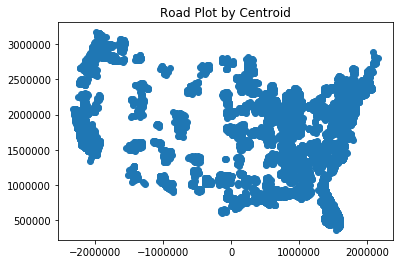

In [28]:
fig = plt.figure()
plt.scatter(fdata['CENTROID_X'], fdata['CENTROID_Y'])
plt.title('Road Plot by Centroid')
plt.savefig('Centroid Plot')
plt.show()

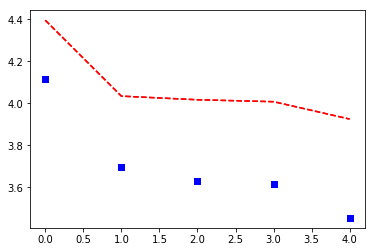

In [47]:
plt.plot(np.array(err_sq), 'r--', 10 *  np.array(err_perc), 'bs')
plt.show()

In [44]:
err_sq

[4.395119894866137,
 4.0340278577223243,
 4.016757150086403,
 4.0075926268965549,
 3.9248793253417094]